<a href="https://colab.research.google.com/github/azizovdatwit/IndividualProjectDS/blob/main/Individual_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Topic: This project aims to analyze the countries/territories with the highest Instagram audience reach as of April 2024 and reasons behind it.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
df1=pd.read_excel("/content/gdrive/MyDrive/colab_notebooks/statistic_id325567_instagram_-countries-with-the-highest-audience-reach-2024 (1).xlsx", sheet_name="Data", skiprows=4)
df1 = df1.iloc[:, 1:]
df1 = df1.drop(df1.columns[2], axis=1)


new_column = ['Country', 'in %']
df1.columns = new_column

df1.head(26)

,Country,in %
0,Bahrain,95.6
1,Kazakhstan,90.8
2,UAE,90.7
3,Turkey,87.3
4,Brunei,85.2
5,Cayman Islands,84.6
6,Kuwait,84.5
7,Uruguay,83.1
8,Chile,81.6
9,Argentina,80.5


Cluster 0:
     Country  in %
15      Guam  76.1
16      Oman  72.8
17     Qatar  73.7
18     Aruba  69.3
19  Portugal  68.6

Cluster 1:
           Country  in %
4           Brunei  85.2
5   Cayman Islands  84.6
6           Kuwait  84.5
7          Uruguay  83.1
8            Chile  81.6
9        Argentina  80.5
10      Montenegro  80.0
11          Panama  79.7
12          Brazil  79.2
13          Cyprus  78.7
14        Barbados  78.6

Cluster 2:
      Country  in %
0     Bahrain  95.6
1  Kazakhstan  90.8
2         UAE  90.7
3      Turkey  87.3



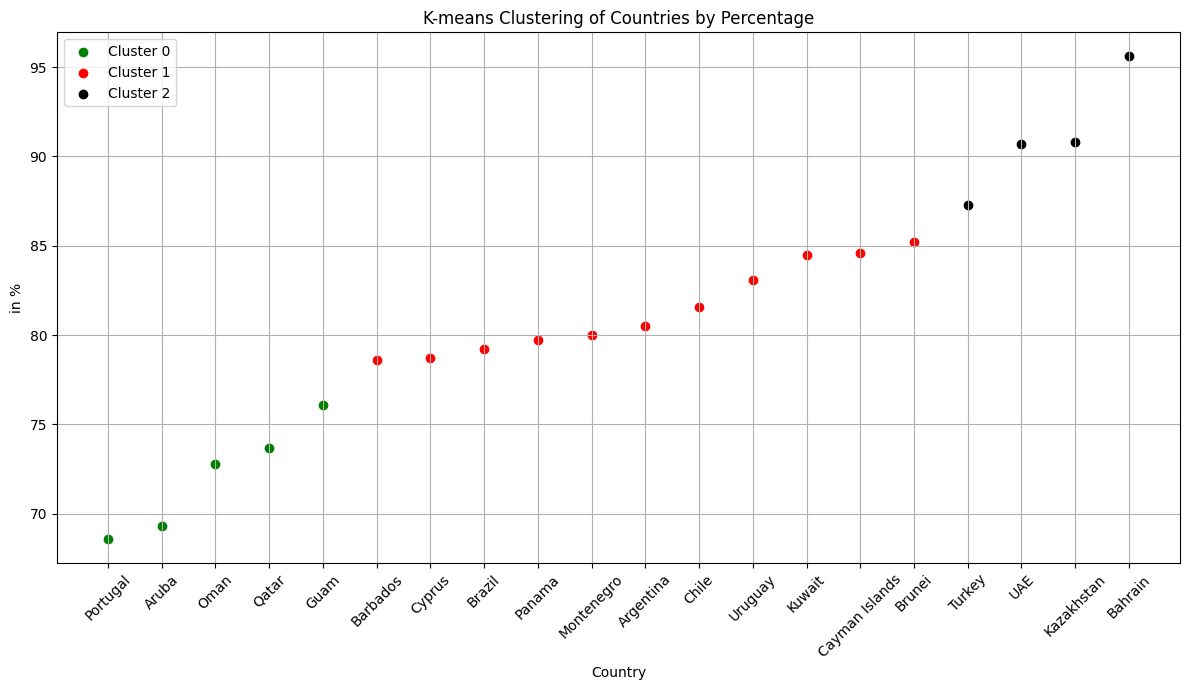

In [ ]:
values = df1['in %'].values.reshape(-1, 1)

km = KMeans(n_clusters=3,random_state=42)
y_predicted = km.fit_predict(values)
df1['cluster'] = y_predicted

centers = km.cluster_centers_.flatten()  # Get the centers
lowest = centers.argmin()    # Get index of lowest center
highest = centers.argmax()   # Get index of highest center
middle = 3 - lowest - highest  # Get the remaining index

# Simple replacement
df1['cluster'] = df1['cluster'].replace({lowest: 0, middle: 1, highest: 2})


df1_sorted = df1.sort_values('in %')

# Separate data by clusters based on sorted data
df11 = df1_sorted[df1_sorted.cluster == 0]
df22 = df1_sorted[df1_sorted.cluster == 1]
df33 = df1_sorted[df1_sorted.cluster == 2]

# Prepare countries for xticks (sorted order)
x_positions = np.arange(len(df1_sorted))
countries = df1_sorted['Country'].values


plt.figure(figsize=(12, 7))


plt.scatter(np.where(df1_sorted.cluster == 0)[0],df11['in %'],color='green', label = 'Cluster 0')
plt.scatter(np.where(df1_sorted.cluster == 1)[0],df22['in %'],color='red', label='Cluster 1')
plt.scatter(np.where(df1_sorted.cluster == 2)[0],df33['in %'],color='black',label='Cluster 2')


plt.xticks(x_positions, countries, rotation=45)


plt.xlabel('Country')
plt.ylabel('in %')
plt.title('K-means Clustering of Countries by Percentage')
plt.grid(True)
plt.tight_layout()

plt.legend()


for cluster_id in range(3):
    print(f"Cluster {cluster_id}:")
    cluster_data = df1[df1.cluster == cluster_id][['Country', 'in %']]
    print(cluster_data)
    print()

In [ ]:
df2=pd.read_excel("/content/gdrive/MyDrive/colab_notebooks/statistic_id268173_countries-with-the-largest-gross-domestic-product--gdp--2024 (1).xlsx", sheet_name="Data", skiprows=4)
df2 = df2.iloc[:, 1:]

newer_column = ['Country', '2023', '2024']
df2.columns = newer_column

df2.head(26)

,Country,2023,2024
0,United States,27357.83,28781.08
1,China,17662.04,18532.63
2,Germany,4457.37,4591.10
3,Japan,4212.94,4110.45
4,India,3572.08,3937.01
5,United Kingdom,3344.74,3495.26
6,France,3031.78,3130.01
7,Brazil,2173.67,2331.39
8,Italy,2255.50,2328.03
9,Canada,2140.09,2242.18


Now when I compare the countires with highest IG usage and the countries with highest GDP, there is only one country that is in the 2 lists - Turkey. From this, we can say that the higher GDP usally means higher employment rate, and means also busy people, so less IG usage.

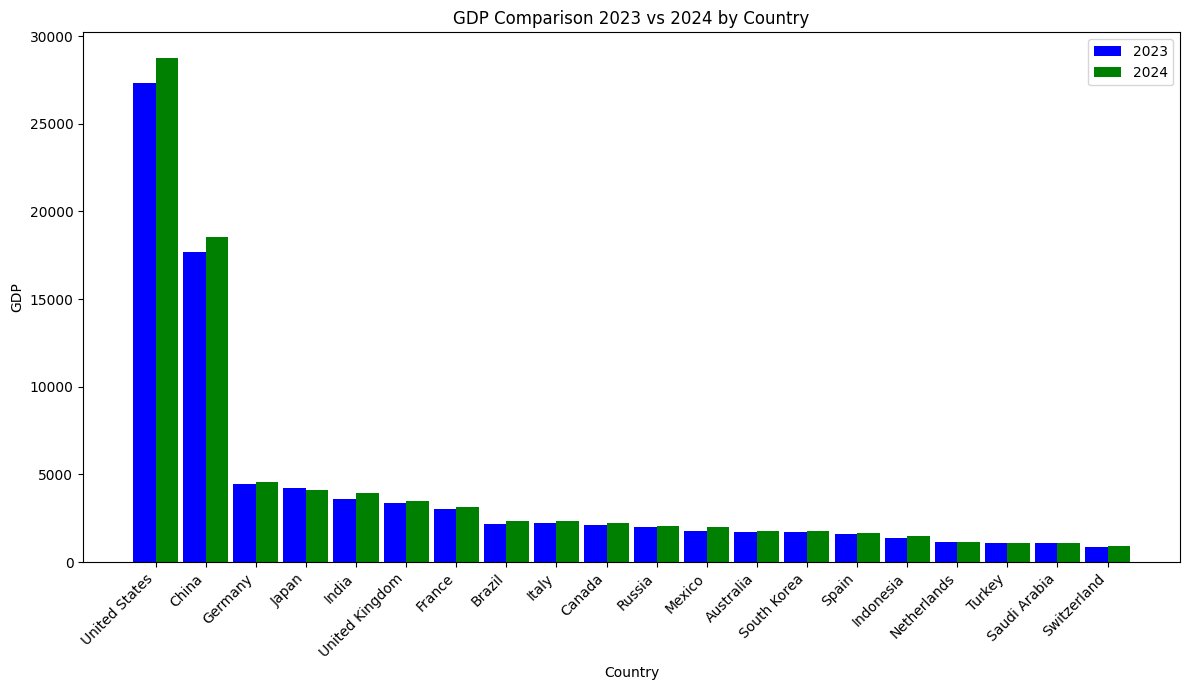

In [ ]:
plt.figure(figsize=(12, 7))
x = np.arange(len(df2))
width = 0.45

plt.bar(x - width/2, df2['2023'], width, label='2023', color='blue')
plt.bar(x + width/2, df2['2024'], width, label='2024', color='green')

plt.xticks(x, df2['Country'], rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('GDP')
plt.title('GDP Comparison 2023 vs 2024 by Country')
plt.legend()
plt.tight_layout()
plt.show()